In [174]:
import pandas as pd 
import numpy as np
from tensorflow import keras
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings


In [ ]:
#BENIM DENEY
#read from csv
training_x = pd.read_csv('training_set_features.csv')
training_y = pd.read_csv('training_set_labels.csv')
test_x = pd.read_csv('test_set_features.csv')

#remove id col
training_x = training_x.iloc[:,1:]
training_x.shape
test_x = test_x.iloc[:,1:]

#concat for label binarizer
datac = [training_x, test_x]
data = pd.concat(datac, ignore_index=True)

columns_to_drop1 = ["employment_industry", "hhs_geo_region", "employment_occupation"]
data = data.drop(labels=columns_to_drop1, axis=1)

data = pd.get_dummies(data)

#fixing the features name may not contain [] < problem
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
data.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in data.columns.values]
data.columns = [c.replace(' ', '_') for c in data.columns]

In [175]:
#read from csv
training_x = pd.read_csv('training_set_features.csv')
training_y = pd.read_csv('training_set_labels.csv')
test_x = pd.read_csv('test_set_features.csv')

#remove id col
training_x = training_x.iloc[:,1:]
training_x.shape
test_x = test_x.iloc[:,1:]

#concat for label binarizer
datac = [training_x, test_x]
data = pd.concat(datac, ignore_index=True)

#binarize the categoric labels
data = pd.get_dummies(data)


#fixing the features name may not contain [] < problem
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
data.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in data.columns.values]
data.columns = [c.replace(' ', '_') for c in data.columns]



In [ ]:
for col in data.columns:
  if np.sum((data.iloc[0:training_x.shape[0],:])[col]) == 0:
    data.drop(col)

In [ ]:
num_vars = data.select_dtypes('float64').columns
num_vars

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children'],
      dtype='object')

In [ ]:
data.head(50)

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,age_group_18_-_34_Years,age_group_35_-_44_Years,age_group_45_-_54_Years,age_group_55_-_64_Years,age_group_65+_Years,education_12_Years,education___12_Years,education_College_Graduate,education_Some_College,race_Black,race_Hispanic,race_Other_or_Multiple,race_White,sex_Male,"income_poverty__=_$75,000,_Above_Poverty","income_poverty_>_$75,000",income_poverty_Below_Poverty,...,employment_industry_dotnnunm,employment_industry_fcxhlnwr,employment_industry_haxffmxo,employment_industry_ldnlellj,employment_industry_mcubkhph,employment_industry_mfikgejo,employment_industry_msuufmds,employment_industry_nduyfdeo,employment_industry_phxvnwax,employment_industry_pxcmvdjn,employment_industry_qnlwzans,employment_industry_rucpziij,employment_industry_saaquncn,employment_industry_vjjrobsf,employment_industry_wlfvacwt,employment_industry_wxleyezf,employment_industry_xicduogh,employment_industry_xqicxuve,employment_occupation_bxpfxfdn,employment_occupation_ccgxvspp,employment_occupation_cmhcxjea,employment_occupation_dlvbwzss,employment_occupation_emcorrxb,employment_occupation_haliazsg,employment_occupation_hfxkjkmi,employment_occupation_hodpvpew,employment_occupation_kldqjyjy,employment_occupation_mxkfnird,employment_occupation_oijqvulv,employment_occupation_pvmttkik,employment_occupation_qxajmpny,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,2.0,0.0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,1.0,0.0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,5.0,2.0,1.0,5.0,4.0,4.0,2.0,3.0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,1.0,1.0,4.0,2.0,1.0,0.0,0.0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,5.0,2.0,1.0,4.0,2.0,1.0,2.0,0.0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,1.0,1.0,4.0,2.0,1.0,1.0,0.0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,2.0,1.0,0.0,1.0,0.0,

In [176]:
columns_to_drop = ["sex_Female", "marital_status_Not_Married", "rent_or_own_Own", "employment_occupation_dcjcmpih"]
data = data.drop(labels=columns_to_drop, axis=1)

In [ ]:
#BENIM DENEME
columns_to_drop = ["sex_Female", "marital_status_Not_Married", "rent_or_own_Own"]
data = data.drop(labels=columns_to_drop, axis=1)

In [ ]:
data.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,age_group_18_-_34_Years,age_group_35_-_44_Years,age_group_45_-_54_Years,age_group_55_-_64_Years,age_group_65+_Years,education_12_Years,education___12_Years,education_College_Graduate,education_Some_College,race_Black,race_Hispanic,race_Other_or_Multiple,race_White,sex_Male,"income_poverty__=_$75,000,_Above_Poverty","income_poverty_>_$75,000",income_poverty_Below_Poverty,marital_status_Married,rent_or_own_Rent,employment_status_Employed,employment_status_Not_in_Labor_Force,employment_status_Unemployed,"census_msa_MSA,_Not_Principle__City","census_msa_MSA,_Principle_City",census_msa_Non-MSA
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,1,0,0,1,0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,2.0,0.0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1,0,0,1,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,1.0,0.0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0


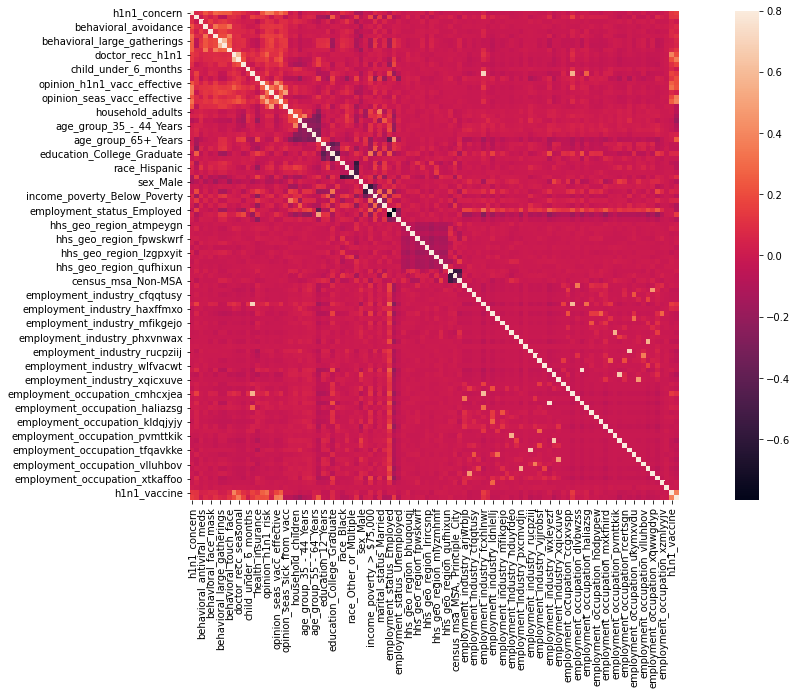

In [ ]:
#correlation matrix
temp = data.join(training_y)
corrmat = temp.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [ ]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=90)
data = pd.DataFrame(pca.fit_transform(data))

In [177]:
#split the data back to test and train 
training_x = data.iloc[0:training_x.shape[0],:]
test_x = data.iloc[training_x.shape[0]:]

In [ ]:
test_x.shape

(26708, 101)

In [193]:
#split to validation and training set
from sklearn.model_selection import train_test_split
perc=0.2
X_train, X_test, y_train, y_test = train_test_split(training_x, training_y, test_size=perc)

In [ ]:
#minMax Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns= X_train.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns= X_train.columns)

In [ ]:
#standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns= X_train.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns= X_train.columns)

In [211]:
from xgboost import XGBClassifier
model_h1n1 = XGBClassifier(n_estimators=10000, learning_rate=0.013,subsample=0.3,colsample_bytree=0.5,max_depth=3,reg_alpha=0.15)

In [212]:
from xgboost import XGBClassifier
model_seasonal = XGBClassifier(n_estimators=10000, learning_rate=0.013,subsample=0.3,colsample_bytree=0.5,max_depth=3,reg_alpha=0.15)

In [213]:
model_h1n1.fit(
    X_train, 
    y_train['h1n1_vaccine'], 
    eval_metric="auc", 
    eval_set=[(X_train, y_train['h1n1_vaccine']), (X_test, y_test['h1n1_vaccine'])], 
    verbose=True, 
    early_stopping_rounds = 1000)


[0]	validation_0-auc:0.810344	validation_1-auc:0.80243
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 1000 rounds.
[1]	validation_0-auc:0.829575	validation_1-auc:0.821658
[2]	validation_0-auc:0.828922	validation_1-auc:0.820536
[3]	validation_0-auc:0.831983	validation_1-auc:0.824201
[4]	validation_0-auc:0.834887	validation_1-auc:0.827998
[5]	validation_0-auc:0.836329	validation_1-auc:0.829458
[6]	validation_0-auc:0.835559	validation_1-auc:0.829003
[7]	validation_0-auc:0.831745	validation_1-auc:0.825246
[8]	validation_0-auc:0.837881	validation_1-auc:0.831415
[9]	validation_0-auc:0.834284	validation_1-auc:0.827897
[10]	validation_0-auc:0.83778	validation_1-auc:0.832066
[11]	validation_0-auc:0.836707	validation_1-auc:0.830932
[12]	validation_0-auc:0.840078	validation_1-auc:0.833889
[13]	validation_0-auc:0.840396	validation_1-auc:0.834507
[14]	validation_0-auc:0.841258	validation_1-auc:0.83619

XGBClassifier(colsample_bytree=0.5, learning_rate=0.013, n_estimators=10000,
              reg_alpha=0.15, subsample=0.3)

H1N1
train: 0.908988
validation: 0.868757


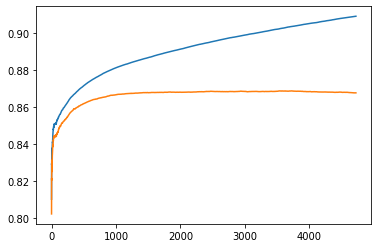

In [215]:
from matplotlib import pyplot
results = model_h1n1.evals_result()
pyplot.plot(results['validation_0']['auc'], label='train')
pyplot.plot(results['validation_1']['auc'], label='test')
print('H1N1')
print('train: ',end='')
print(max(results['validation_0']['auc']))
print('validation: ',end='')
print(max(results['validation_1']['auc']))

In [ ]:
from sklearn.metrics import accuracy_score
yhat = model_h1n1.predict(X_test)
score = accuracy_score(y_test['h1n1_vaccine'], yhat)
print('Accuracy: %.3f' % score)

Accuracy: 0.856


In [214]:
model_seasonal.fit(
    X_train, 
    y_train['seasonal_vaccine'], 
    eval_metric="auc", 
    eval_set=[(X_train, y_train['seasonal_vaccine']), (X_test, y_test['seasonal_vaccine'])], 
    verbose=True, 
    early_stopping_rounds = 1000)


[0]	validation_0-auc:0.700731	validation_1-auc:0.704664
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 1000 rounds.
[1]	validation_0-auc:0.766402	validation_1-auc:0.770917
[2]	validation_0-auc:0.794087	validation_1-auc:0.79911
[3]	validation_0-auc:0.806529	validation_1-auc:0.810936
[4]	validation_0-auc:0.800782	validation_1-auc:0.806059
[5]	validation_0-auc:0.816984	validation_1-auc:0.822312
[6]	validation_0-auc:0.825843	validation_1-auc:0.830071
[7]	validation_0-auc:0.82643	validation_1-auc:0.830941
[8]	validation_0-auc:0.82824	validation_1-auc:0.832926
[9]	validation_0-auc:0.829829	validation_1-auc:0.834067
[10]	validation_0-auc:0.833319	validation_1-auc:0.836604
[11]	validation_0-auc:0.83363	validation_1-auc:0.836464
[12]	validation_0-auc:0.835356	validation_1-auc:0.837778
[13]	validation_0-auc:0.835675	validation_1-auc:0.838426
[14]	validation_0-auc:0.836284	validation_1-auc:0.8393
[1

XGBClassifier(colsample_bytree=0.5, learning_rate=0.013, n_estimators=10000,
              reg_alpha=0.15, subsample=0.3)

SEASONAL
train: 0.885369
validation: 0.867961


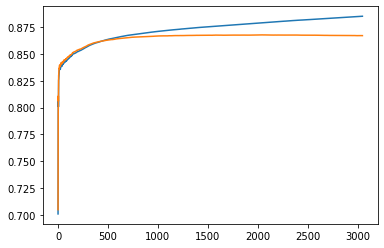

In [216]:
from matplotlib import pyplot
results = model_seasonal.evals_result()
pyplot.plot(results['validation_0']['auc'], label='train')
pyplot.plot(results['validation_1']['auc'], label='test')

print('SEASONAL')
print('train: ',end='')
print(max(results['validation_0']['auc']))
print('validation: ',end='')
print(max(results['validation_1']['auc']))

In [ ]:
from sklearn.metrics import accuracy_score
yhat = model_seasonal.predict(X_test)
score = accuracy_score(y_test['seasonal_vaccine'], yhat)
print('Accuracy: %.3f' % score)

Accuracy: 0.787


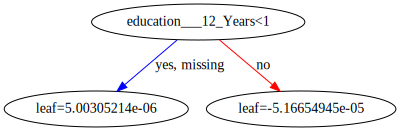

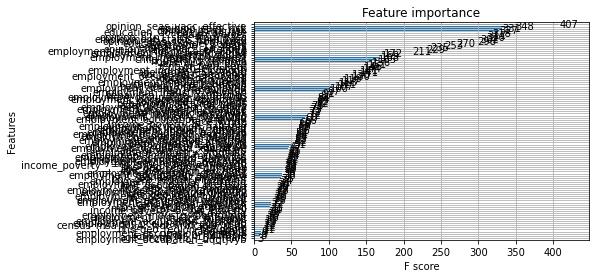

In [ ]:
import graphviz
import xgboost as xgb
xgb.plot_importance(model_h1n1)
xgb.to_graphviz(model_h1n1, num_trees=model_h1n1.best_iteration)

In [218]:
preds_h1n1 = model_h1n1.predict_proba(test_x)
preds_seasonal = model_seasonal.predict_proba(test_x)

In [219]:
submission = pd.read_csv('submission_format.csv')
submission['h1n1_vaccine'] = 1-preds_h1n1
submission['seasonal_vaccine'] = 1-preds_seasonal

In [ ]:
submission.head(100)

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.097419,0.368139
1,26708,0.047197,0.032608
2,26709,0.155310,0.729310
3,26710,0.643598,0.855932
4,26711,0.283055,0.434143
...,...,...,...
95,26802,0.117634,0.214811
96,26803,0.037610,0.147058
97,26804,0.030849,0.087641
98,26805,0.076849,0.169471


In [220]:
submission.to_csv('submission_xgboost_muraaaaaa.csv', index=False)